In [36]:
import networkx as nx
from src.plotting import plot_graph
from typing import Any
import os

TEST_GRAPH_FILES = [
    "graph_1_wo_cycles.edgelist",
    "graph_2_wo_cycles.edgelist",
    "graph_3_w_cycles.edgelist",
]


def get_keys(d, key_to_find):
    for key, val in d.items():
        if val == key_to_find:
            return key
        else:
            return -1


stack = []
flag = 0

In [37]:
# nx.simple_cycles(G)) - WONT BE USED
def has_cycles(G: nx.DiGraph, starting_node, visited: dict[Any], node_highlight, edge_highlight):
    global flag
    visited[starting_node] = True
    node_highlight.append(starting_node)
    global stack, stack_copy
    stack.append(starting_node)
    for neighbor in G.successors(starting_node):
        edge_highlight.append((starting_node, neighbor))
        # plot_graph(G, highlighted_edges=edge_highlight, highlighted_nodes=node_highlight)
        if visited[neighbor]:
            print(f'{stack} <- cycle info')
            flag = 1
            return flag
        else:
            has_cycles(G, neighbor, visited, node_highlight, edge_highlight)
    node_highlight.pop(node_highlight.index(starting_node))
    visited[starting_node] = False

    stack.pop()
    return flag

/Users/alicee/Desktop/конспекты/Algos_2/spbu-fundamentals-of-algorithms/practicum_2/homework/advanced


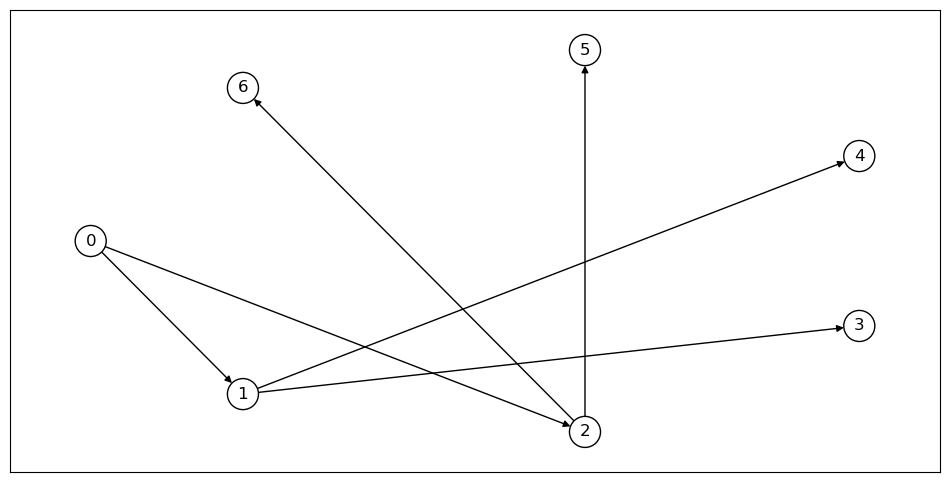

HERE
0
1
2
3
4
5
6
Plotting of found cycle is available, just uncomment line 32
The last 2 images are useless, they are created beacuse of the recursion
The graph graph_1_wo_cycles.edgelist has a cycle which is printed above this message


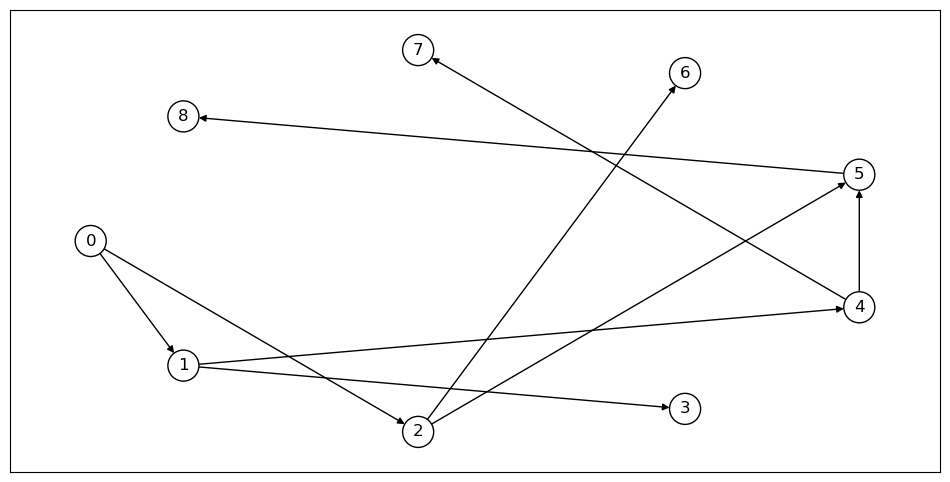

HERE
0
1
2
3
4
5
6
7
8
Plotting of found cycle is available, just uncomment line 32
The last 2 images are useless, they are created beacuse of the recursion
The graph graph_2_wo_cycles.edgelist has a cycle which is printed above this message


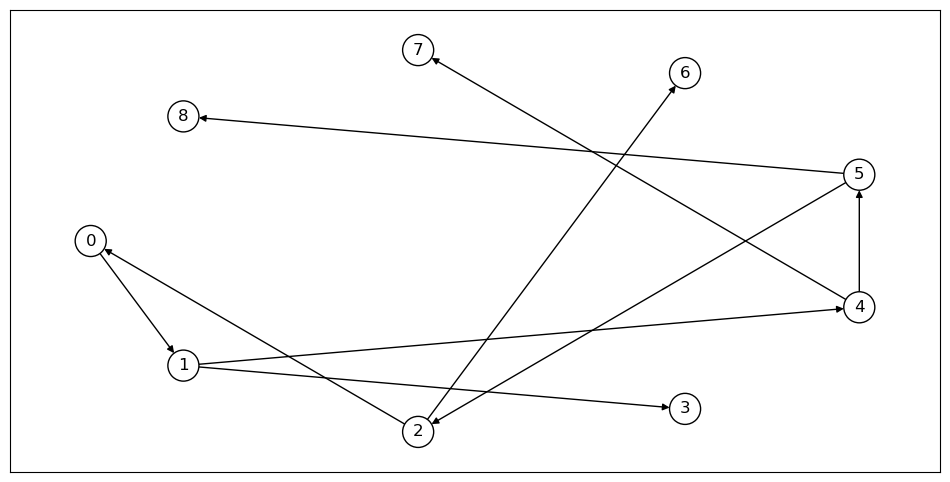

HERE
0
['0', '1', '4', '5', '2'] <- cycle info
1
['0', '1', '4', '5'] <- cycle info
2
['0', '1', '4'] <- cycle info
3
['0', '1'] <- cycle info
4
['0'] <- cycle info
5


NetworkXError: The node -1 is not in the digraph.

In [39]:
import os
print(os.getcwd())
for filename in TEST_GRAPH_FILES:
    # Load the graph
    G = nx.read_edgelist(filename, create_using=nx.DiGraph)
    # Output whether it has cycles
    visited = {n: False for n in G}  # False - not visited, True - visited
    nodes_to_highlight = []
    edges_to_highlight = []
    plot_graph(G)
    print("HERE")
    for node in G.nodes:
        print(node)
        global stack
        stack = []
        flag_cycles = has_cycles(G, get_keys(visited, False), visited=visited, node_highlight=nodes_to_highlight,
                                 edge_highlight=edges_to_highlight)
    if (flag_cycles):
        print('Plotting of found cycle is available, just uncomment line 32')
        print('The last 2 images are useless, they are created beacuse of the recursion')
        print(f'The graph {filename} has a cycle which is printed above this message')
    else:
        print("Graph doesnt have any cycles")

print('\n', '-' * 32, '\n')
print('nx.simple_cycles(G)) - WONT BE USED!')
print("MAIN PROBLEM - return True doesnt stop the recursion so you cant stop the funtion!")

In [ ]:
d 